In [6]:
# Gdrive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [40]:
# Libs
import os
import io
import json
import distutils.dir_util

import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import pickle

from collections import Counter, defaultdict
from itertools import chain

In [8]:
# Functions
def write_json(data, fname):
    def _conv(o):
        if isinstance(o, (np.int64, np.int32)):
            return int(o)
        raise TypeError

    parent = os.path.dirname(fname)
    distutils.dir_util.mkpath(parent)

    with io.open(fname, "w", encoding="utf-8") as f:
        json_str = json.dumps(data, ensure_ascii=False, default=_conv)
        f.write(json_str)


def load_json(fname):
    with open(fname, encoding='utf-8') as f:
        json_obj = json.load(f)

    return json_obj

In [61]:
 # Datasets
CURR_DIR_NAME = 'Test/'
PATH = f'/content/drive/MyDrive/' + CURR_DIR_NAME
genre_gn_all_dict = load_json(PATH + 'genre_gn_all.json')
song_meta_json = load_json(PATH + 'song_meta.json')

train = load_json(PATH + 'test.json')
val = load_json(PATH + 'val.json')
test = load_json(PATH + 'test.json')

data = train + val + test
data_df = pd.DataFrame(data)
data_df.tail()

,tags,id,plylst_title,songs,like_cnt,updt_date
44490,[추억],137930,,"[323755, 397594, 445908, 570242, 221853, 20018...",16,2016-04-18 11:02:09.000
44491,"[띵곡의, 우울, 분위기, 드라이브, 산책]",936,,"[105140, 582252, 199262, 422915, 547967, 48791...",1,2020-04-08 07:15:59.000
44492,[기분전환],110589,,"[21976, 207746, 40025, 31635, 567462, 641799, ...",6,2016-06-29 00:57:21.000
44493,[여름],2605,,"[234554, 265033, 507260, 83092, 366757, 497097...",4,2015-06-06 09:52:01.000
44494,[],126651,,"[685111, 20039, 634240, 519385, 321994, 525309...",14,2015-10-26 17:43:30.000


In [12]:
# 1. 일정 count 아래의 음악은 제외
data_df['songs_counter'] = data_df['songs'].map(lambda x: Counter(x))

data_df.head()

,tags,id,plylst_title,songs,like_cnt,updt_date,songs_counter
0,[],70107,,"[398985, 449403, 411543, 528044, 143048, 98020...",6,2012-09-29 01:57:26.000,"{398985: 1, 449403: 1, 411543: 1, 528044: 1, 1..."
1,"[나만의Best3, 인디아티스트들의추천음악]",7461,,"[196298, 269984, 267805, 175867, 529244, 63825...",0,2019-12-17 14:06:45.000,"{196298: 1, 269984: 1, 267805: 1, 175867: 1, 5..."
2,[드라이브],90348,,"[273433, 331003, 68432, 411659, 117793, 616860...",21,2015-05-23 10:44:48.000,"{273433: 1, 331003: 1, 68432: 1, 411659: 1, 11..."
3,[분위기],58617,,"[702227, 48152, 440008, 358488, 701041, 540721...",0,2019-03-14 09:47:34.000,"{702227: 1, 48152: 1, 440008: 1, 358488: 1, 70..."
4,[],102395,,"[630683, 481582, 528550, 285114, 506667, 17922...",38,2018-07-11 16:43:32.000,"{630683: 1, 481582: 1, 528550: 1, 285114: 1, 5..."


In [14]:
songs_counter = Counter()
for playlist in data:
    songs_counter += Counter(playlist['songs'])

In [28]:
write_json(songs_counter, PATH + 'songs_counter.json')

In [62]:
data_df

,tags,id,plylst_title,songs,like_cnt,updt_date
0,[],70107,,"[398985, 449403, 411543, 528044, 143048, 98020...",6,2012-09-29 01:57:26.000
1,"[나만의Best3, 인디아티스트들의추천음악]",7461,,"[196298, 269984, 267805, 175867, 529244, 63825...",0,2019-12-17 14:06:45.000
2,[드라이브],90348,,"[273433, 331003, 68432, 411659, 117793, 616860...",21,2015-05-23 10:44:48.000
3,[분위기],58617,,"[702227, 48152, 440008, 358488, 701041, 540721...",0,2019-03-14 09:47:34.000
4,[],102395,,"[630683, 481582, 528550, 285114, 506667, 17922...",38,2018-07-11 16:43:32.000
...,...,...,...,...,...,...
44490,[추억],137930,,"[323755, 397594, 445908, 570242, 221853, 20018...",16,2016-04-18 11:02:09.000
44491,"[띵곡의, 우울, 분위기, 드라이브, 산책]",936,,"[105140, 582252, 199262, 422915, 547967, 48791...",1,2020-04-08 07:15:59.000
44492,[기분전환],110589,,"[21976, 207746, 40025, 31635, 567462, 641799, ...",6,2016-06-29 00:57:21.000
44493,[여름],2605,,"[234554, 265033, 507260, 83092, 366757, 497097...",4,2015-06-06 09:52:01.000


In [66]:
data_df['songs_counter'] = data_df['songs'].map(lambda x: Counter(x))

In [78]:
def count_plylst_songs(_counter):
    return sum(songs_counter[_id] for _id in _counter)


data_df['songs_total_cnt'] = data_df['songs_counter'].apply(lambda x: count_plylst_songs(x))

In [79]:
data_df

,tags,id,plylst_title,songs,like_cnt,updt_date,songs_counter,songs_total_cnt
0,[],70107,,"[398985, 449403, 411543, 528044, 143048, 98020...",6,2012-09-29 01:57:26.000,"{398985: 1, 449403: 1, 411543: 1, 528044: 1, 1...",1247
1,"[나만의Best3, 인디아티스트들의추천음악]",7461,,"[196298, 269984, 267805, 175867, 529244, 63825...",0,2019-12-17 14:06:45.000,"{196298: 1, 269984: 1, 267805: 1, 175867: 1, 5...",185
2,[드라이브],90348,,"[273433, 331003, 68432, 411659, 117793, 616860...",21,2015-05-23 10:44:48.000,"{273433: 1, 331003: 1, 68432: 1, 411659: 1, 11...",1713
3,[분위기],58617,,"[702227, 48152, 440008, 358488, 701041, 540721...",0,2019-03-14 09:47:34.000,"{702227: 1, 48152: 1, 440008: 1, 358488: 1, 70...",409
4,[],102395,,"[630683, 481582, 528550, 285114, 506667, 17922...",38,2018-07-11 16:43:32.000,"{630683: 1, 481582: 1, 528550: 1, 285114: 1, 5...",52
...,...,...,...,...,...,...,...,...
44490,[추억],137930,,"[323755, 397594, 445908, 570242, 221853, 20018...",16,2016-04-18 11:02:09.000,"{323755: 1, 397594: 1, 445908: 1, 570242: 1, 2...",172
44491,"[띵곡의, 우울, 분위기, 드라이브, 산책]",936,,"[105140, 582252, 199262, 422915, 547967, 48791...",1,2020-04-08 07:15:59.000,"{105140: 1, 582252: 1, 199262: 1, 422915: 1, 5...",5182
44492,[기분전환],110589,,"[21976, 207746, 40025, 31635, 567462, 641799, ...",6,2016-06-29 00:57:21.000,"{21976: 1, 207746: 1, 40025: 1, 31635: 1, 5674...",350
44493,[여름],2605,,"[234554, 265033, 507260, 83092, 366757, 497097...",4,2015-06-06 09:52:01.000,"{234554: 1, 265033: 1, 507260: 1, 83092: 1, 36...",651


In [119]:
data_df.to_pickle(PATH + "data_count.pkl")

In [120]:
data_df = pd.read_pickle(PATH +'data_count.pkl')

In [96]:
min(data_df['songs_total_cnt']), max(data_df['songs_total_cnt'])

(0, 13397)

(array([1.9814e+04, 5.3330e+03, 3.6480e+03, 2.6580e+03, 2.0870e+03,
        1.6110e+03, 1.2830e+03, 1.0410e+03, 8.9400e+02, 7.1600e+02,
        5.7100e+02, 5.1100e+02, 4.0800e+02, 3.6700e+02, 3.0000e+02,
        3.0900e+02, 2.3400e+02, 2.3800e+02, 2.0300e+02, 1.7000e+02,
        1.5600e+02, 1.6800e+02, 1.8300e+02, 1.4700e+02, 1.1100e+02,
        1.0500e+02, 1.1700e+02, 1.1600e+02, 7.6000e+01, 6.5000e+01,
        6.5000e+01, 5.7000e+01, 6.5000e+01, 4.9000e+01, 5.2000e+01,
        3.6000e+01, 3.2000e+01, 3.4000e+01, 4.0000e+01, 5.0000e+01,
        3.8000e+01, 3.9000e+01, 5.0000e+01, 5.2000e+01, 4.0000e+01,
        3.4000e+01, 3.8000e+01, 3.0000e+01, 6.0000e+00, 1.4000e+01,
        1.0000e+01, 3.0000e+00, 1.0000e+00, 2.0000e+00, 2.0000e+00,
        2.0000e+00, 2.0000e+00, 2.0000e+00, 3.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 2.0000e+00, 2.0000e+00,
        1.0000e+00, 0.0000e+00, 0.0000e+00, 0.00

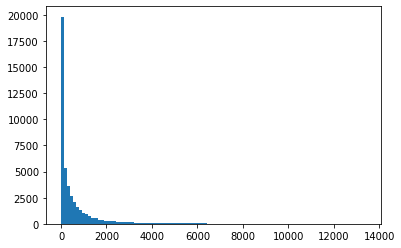

In [97]:
plt.hist(data_df['songs_total_cnt'], bins=100)

In [110]:
def get_outlier(df=None, column=None, weight=1.5):
  quantile_25 = np.percentile(df[column].values, 25)
  quantile_75 = np.percentile(df[column].values, 75)

  IQR = quantile_75 - quantile_25
  IQR_weight = IQR*weight
  
  lowest = quantile_25 - IQR_weight
  highest = quantile_75 + IQR_weight
  
  # outlier_idx = df[column][(df[column] < lowest) | (df[column] > highest)].index
  outlier_idx = df[column][(df[column] < lowest)].index
  return outlier_idx

# 함수 사용해서 이상치 값 삭제
data_df = pd.read_pickle('data_count.pkl')
outlier_idx = get_outlier(df=data_df, column='songs_total_cnt', weight=0)
data_df.drop(outlier_idx, axis=0, inplace=True)

33407

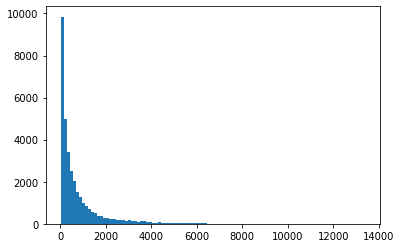

In [111]:
plt.hist(data_df['songs_total_cnt'], bins=100)
len(data_df)

In [116]:
data_df.drop(['songs_counter', 'songs_total_cnt'], axis=1)

,tags,id,plylst_title,songs,like_cnt,updt_date
0,[],70107,,"[398985, 449403, 411543, 528044, 143048, 98020...",6,2012-09-29 01:57:26.000
1,"[나만의Best3, 인디아티스트들의추천음악]",7461,,"[196298, 269984, 267805, 175867, 529244, 63825...",0,2019-12-17 14:06:45.000
2,[드라이브],90348,,"[273433, 331003, 68432, 411659, 117793, 616860...",21,2015-05-23 10:44:48.000
3,[분위기],58617,,"[702227, 48152, 440008, 358488, 701041, 540721...",0,2019-03-14 09:47:34.000
4,[],102395,,"[630683, 481582, 528550, 285114, 506667, 17922...",38,2018-07-11 16:43:32.000
...,...,...,...,...,...,...
44490,[추억],137930,,"[323755, 397594, 445908, 570242, 221853, 20018...",16,2016-04-18 11:02:09.000
44491,"[띵곡의, 우울, 분위기, 드라이브, 산책]",936,,"[105140, 582252, 199262, 422915, 547967, 48791...",1,2020-04-08 07:15:59.000
44492,[기분전환],110589,,"[21976, 207746, 40025, 31635, 567462, 641799, ...",6,2016-06-29 00:57:21.000
44493,[여름],2605,,"[234554, 265033, 507260, 83092, 366757, 497097...",4,2015-06-06 09:52:01.000


In [121]:
data_df.to_json(PATH + "data_ver1.json")

In [128]:
data_df = pd.DataFrame(load_json(PATH +'data_ver1.json'))
data_df

,tags,id,plylst_title,songs,like_cnt,updt_date,songs_counter,songs_total_cnt
0,[],70107,,"[398985, 449403, 411543, 528044, 143048, 98020...",6,2012-09-29 01:57:26.000,"{'398985': 1, '449403': 1, '411543': 1, '52804...",1247
1,"[나만의Best3, 인디아티스트들의추천음악]",7461,,"[196298, 269984, 267805, 175867, 529244, 63825...",0,2019-12-17 14:06:45.000,"{'196298': 1, '269984': 1, '267805': 1, '17586...",185
2,[드라이브],90348,,"[273433, 331003, 68432, 411659, 117793, 616860...",21,2015-05-23 10:44:48.000,"{'273433': 1, '331003': 1, '68432': 1, '411659...",1713
3,[분위기],58617,,"[702227, 48152, 440008, 358488, 701041, 540721...",0,2019-03-14 09:47:34.000,"{'702227': 1, '48152': 1, '440008': 1, '358488...",409
4,[],102395,,"[630683, 481582, 528550, 285114, 506667, 17922...",38,2018-07-11 16:43:32.000,"{'630683': 1, '481582': 1, '528550': 1, '28511...",52
...,...,...,...,...,...,...,...,...
44490,[추억],137930,,"[323755, 397594, 445908, 570242, 221853, 20018...",16,2016-04-18 11:02:09.000,"{'323755': 1, '397594': 1, '445908': 1, '57024...",172
44491,"[띵곡의, 우울, 분위기, 드라이브, 산책]",936,,"[105140, 582252, 199262, 422915, 547967, 48791...",1,2020-04-08 07:15:59.000,"{'105140': 1, '582252': 1, '199262': 1, '42291...",5182
44492,[기분전환],110589,,"[21976, 207746, 40025, 31635, 567462, 641799, ...",6,2016-06-29 00:57:21.000,"{'21976': 1, '207746': 1, '40025': 1, '31635':...",350
44493,[여름],2605,,"[234554, 265033, 507260, 83092, 366757, 497097...",4,2015-06-06 09:52:01.000,"{'234554': 1, '265033': 1, '507260': 1, '83092...",651
